In [1]:
import torch
import torch_ext_test
import time
import numpy as np

torch.random.manual_seed(0)
my_func = torch_ext_test.my_func

torch.set_printoptions(sci_mode=False)
a = torch.randn((100, 100, 100))
b = torch.randn((100, 100, 100))
# a = torch.ones((100, 100, 100), dtype=torch.float32) * 1
# b = torch.ones((100, 100, 100), dtype=torch.float32) * 128
# # a_cpu = a.cpu() 
# b_cpu = b.cpu()



t0 = time.time()
for _ in range(10000):
    a + b

print("torch add time: ", time.time() - t0)

a = a.cuda()
b = b.cuda()
t0 = time.time()
for _ in range(10000):
    my_func(a, b)

print("torch_ext_test.my_func time: ", time.time() - t0)

torch add time:  0.2758677005767822
torch_ext_test.my_func time:  0.3847625255584717


In [2]:
torch.allclose(a + b, my_func(a, b))

True

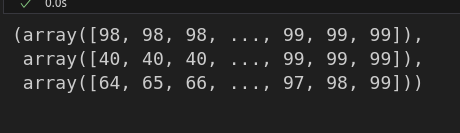

In [3]:
import torch.nn.functional as F

# x = torch.randn(2, 10, 10, 100, dtype=torch.float32).cuda()
# w = torch.randn(100, 100, dtype=torch.float32).cuda()

x = torch.ones((2, 10, 10, 100), dtype=torch.float32).cuda() * 3
w = torch.ones((100, 100), dtype=torch.float32).cuda()

t0 = time.time()
for _ in range(10000):
    F.linear(x, w)
print("torch F.linear time: ", time.time() - t0)

torch F.linear time:  0.78448486328125


In [4]:
a = torch.Tensor([[1, 2], [3, 4]]).cuda()
b = torch.Tensor([[1, 2, 3], [4, 5, 6]]).cuda()

torch_ext_test.my_func_mm(a, b)

tensor([[ 9., 12., 15.],
        [19., 26., 33.]], device='cuda:0')

In [1]:
import torch
import torch_ext_test
import time
import numpy as np

torch.random.manual_seed(0)
my_func_mm = torch_ext_test.my_func_mm

torch.set_printoptions(sci_mode=False)
a = torch.randn((100, 100)).cuda()
b = torch.randn((100, 100)).cuda()



t0 = time.time()
for _ in range(10000):
    torch.matmul(a, b)

print("torch mat time: ", time.time() - t0)

a = a.cuda()
b = b.cuda()
t0 = time.time()
for _ in range(10000):
    my_func_mm(a, b)

print("torch_ext_test.my_func_mm time: ", time.time() - t0)

torch mat time:  0.3759801387786865
torch_ext_test.my_func_mm time:  0.05165219306945801


In [2]:


A = torch.Tensor([[[1, 2, 3], [4, 5, 6]], [[6, 5, 4], [3, 2, 1]]]).cuda()
B = torch.Tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9]]).cuda()
B_T = B.T
bias = torch.Tensor([[0.5, 0.6, 0.7]]).cuda()

torch_ext_test.my_func_mm_bc(A, B)

tensor([[[30., 36., 42.],
         [66., 81., 96.]],

        [[54., 69., 84.],
         [18., 24., 30.]]], device='cuda:0')

In [23]:
F.linear(A, B_T)

tensor([[[30., 36., 42.],
         [66., 81., 96.]],

        [[54., 69., 84.],
         [18., 24., 30.]]], device='cuda:0')

In [4]:
import torch
import torch_ext_test
import torch.nn.functional as F
import time

A = torch.randn((1, 900, 512)).cuda()
B = torch.randn((512, 512)).cuda()
bias = torch.randn((512)).cuda()
B_T = B.T

print(torch.allclose(F.linear(A, B.T, bias), torch_ext_test.my_func_mm_bc(A, B, bias), rtol=1e-4, atol=1e-4))

import time
import torch.nn.functional as F
t0 = time.time()
for _ in range(100):
    torch_ext_test.my_func_mm_bc(A, B, bias)
print("torch_ext_test.my_func_mm_bc time: ", time.time() - t0)

t0 = time.time()
for _ in range(100):
    F.linear(A, B_T)
print("torch F.linear time: ", time.time() - t0)
torch_ext_test.my_func_mm_bc(A, B, bias).shape

True
torch_ext_test.my_func_mm_bc time:  0.0005195140838623047
torch F.linear time:  0.0009760856628417969


torch.Size([1, 900, 512])

In [4]:
import numpy as np
np.where(F.linear(A, B_T).cpu().numpy() != torch_ext_test.my_func_mm_bc(A, B.T, bias).cpu().numpy())

(array([0, 0, 0, ..., 0, 0, 0]),
 array([  0,   0,   0, ..., 899, 899, 899]),
 array([  0,   1,   2, ..., 253, 254, 255]))

In [5]:
torch.max(torch.abs(F.linear(A, B_T) - torch_ext_test.my_func_mm_bc(A, B, bias)))

tensor(9.1553e-05, device='cuda:0')

In [4]:
a = torch.Tensor([[[1, 2], [3, 4]], [[5, 6], [7, 8]]]).cuda()
b = torch.Tensor([[1, 2, 3], [4, 5, 6]]).cuda()
bias = torch.zeros_like(b)
torch_ext_test.my_func_mm_bc(a, b, bias)

tensor([[[ 9., 12., 15.],
         [19., 26., 33.]],

        [[29., 40., 51.],
         [39., 54., 69.]]], device='cuda:0')

In [2]:
import torch
import torch_ext_test
import torch.nn.functional as F

x = torch.randn((5, 10)).cuda()
w = torch.randn(10, 10).cuda()


F.linear(x, w).shape

torch.Size([5, 10])

In [10]:
x = torch.tensor([[127, 2], [5, 4]], dtype=torch.float).cuda()
w = torch.tensor([[1, -1], [1, -1]], dtype=torch.float).cuda()
b = torch.tensor([1, 1], dtype=torch.float).cuda()

x_8 = torch.tensor([[127, 2], [5, 4]], dtype=torch.int8).cuda()
w_8 = torch.tensor([[1, -1], [1, -1]], dtype=torch.int8).cuda()
b_8 = torch.tensor([1, 1], dtype=torch.int8).cuda()



F.linear(x, w, b)

tensor([[126., 126.],
        [  2.,   2.]], device='cuda:0')

In [42]:
import numpy as np
import torch
import torch_ext_test
import torch.nn.functional as F
import time

x_o = np.random.randint(-126, 126, (1, 900, 512))
w_o = np.ones((512, 512))
b_o = np.ones((512))

x_8 = torch.tensor(x_o, dtype=torch.float32).cuda()
w_8 = torch.tensor(w_o, dtype=torch.float32).cuda()
b_8 = torch.tensor(b_o, dtype=torch.float32).cuda()

x = torch.tensor(x_o, dtype=torch.float32).cuda()
w = torch.tensor(w_o, dtype=torch.float32).cuda()
b = torch.tensor(b_o, dtype=torch.float32).cuda()




avg_cost_time = 0
for _ in range(1000):
    t0 = time.time()
    out_F = F.linear(x, w, b)
    avg_cost_time += time.time() - t0
print("torch F.linear time: ", avg_cost_time / 1000)

avg_cost_time = 0
for _ in range(1000):
    t0 = time.time()
    out_my = torch_ext_test.my_func_mm_bc_add(x_8, w_8, b_8)
    avg_cost_time += time.time() - t0
print("torch_ext_test.my_func_mm_bc_add time: ", avg_cost_time / 1000)

t0 = time.time()
for _ in range(1000):
    out_my = torch_ext_test.my_func_mm_bc(x, w, b)
print("torch_ext_test.my_func_mm_bc time: ", time.time() - t0)


torch F.linear time:  2.174210548400879e-05
torch_ext_test.my_func_mm_bc_add time:  7.892251014709472e-05
torch_ext_test.my_func_mm_bc time:  0.1057291030883789


In [8]:
torch.allclose(out_F, torch.tensor(out_my, dtype=torch.float32), rtol=1e-5, atol=1e-5)
# out_my.shape

/tmp/ipykernel_9592/2381930072.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.allclose(out_F, torch.tensor(out_my, dtype=torch.float32), rtol=1e-5, atol=1e-5)


True

In [13]:
out_my[0]


tensor([[ 2382.,  2382.,  2382.,  ...,  2382.,  2382.,  2382.],
        [-1085., -1085., -1085.,  ..., -1085., -1085., -1085.],
        [-2312., -2312., -2312.,  ..., -2312., -2312., -2312.],
        ...,
        [ 1276.,  1276.,  1276.,  ...,  1276.,  1276.,  1276.],
        [ 1062.,  1062.,  1062.,  ...,  1062.,  1062.,  1062.],
        [-1878., -1878., -1878.,  ..., -1878., -1878., -1878.]],
       device='cuda:0')